In [39]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
# Load data
df = pd.read_csv('../data/processed/cleaned_data_20240621_143909.csv')

In [41]:
# Drop duplicates and irrelevant columns
df.drop_duplicates(inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)

In [42]:
# Define the numerical and categorical features
numeric_features = ['loan_amount', 'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age', 'remaining_term', 'salary']
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('disbursement_date') 

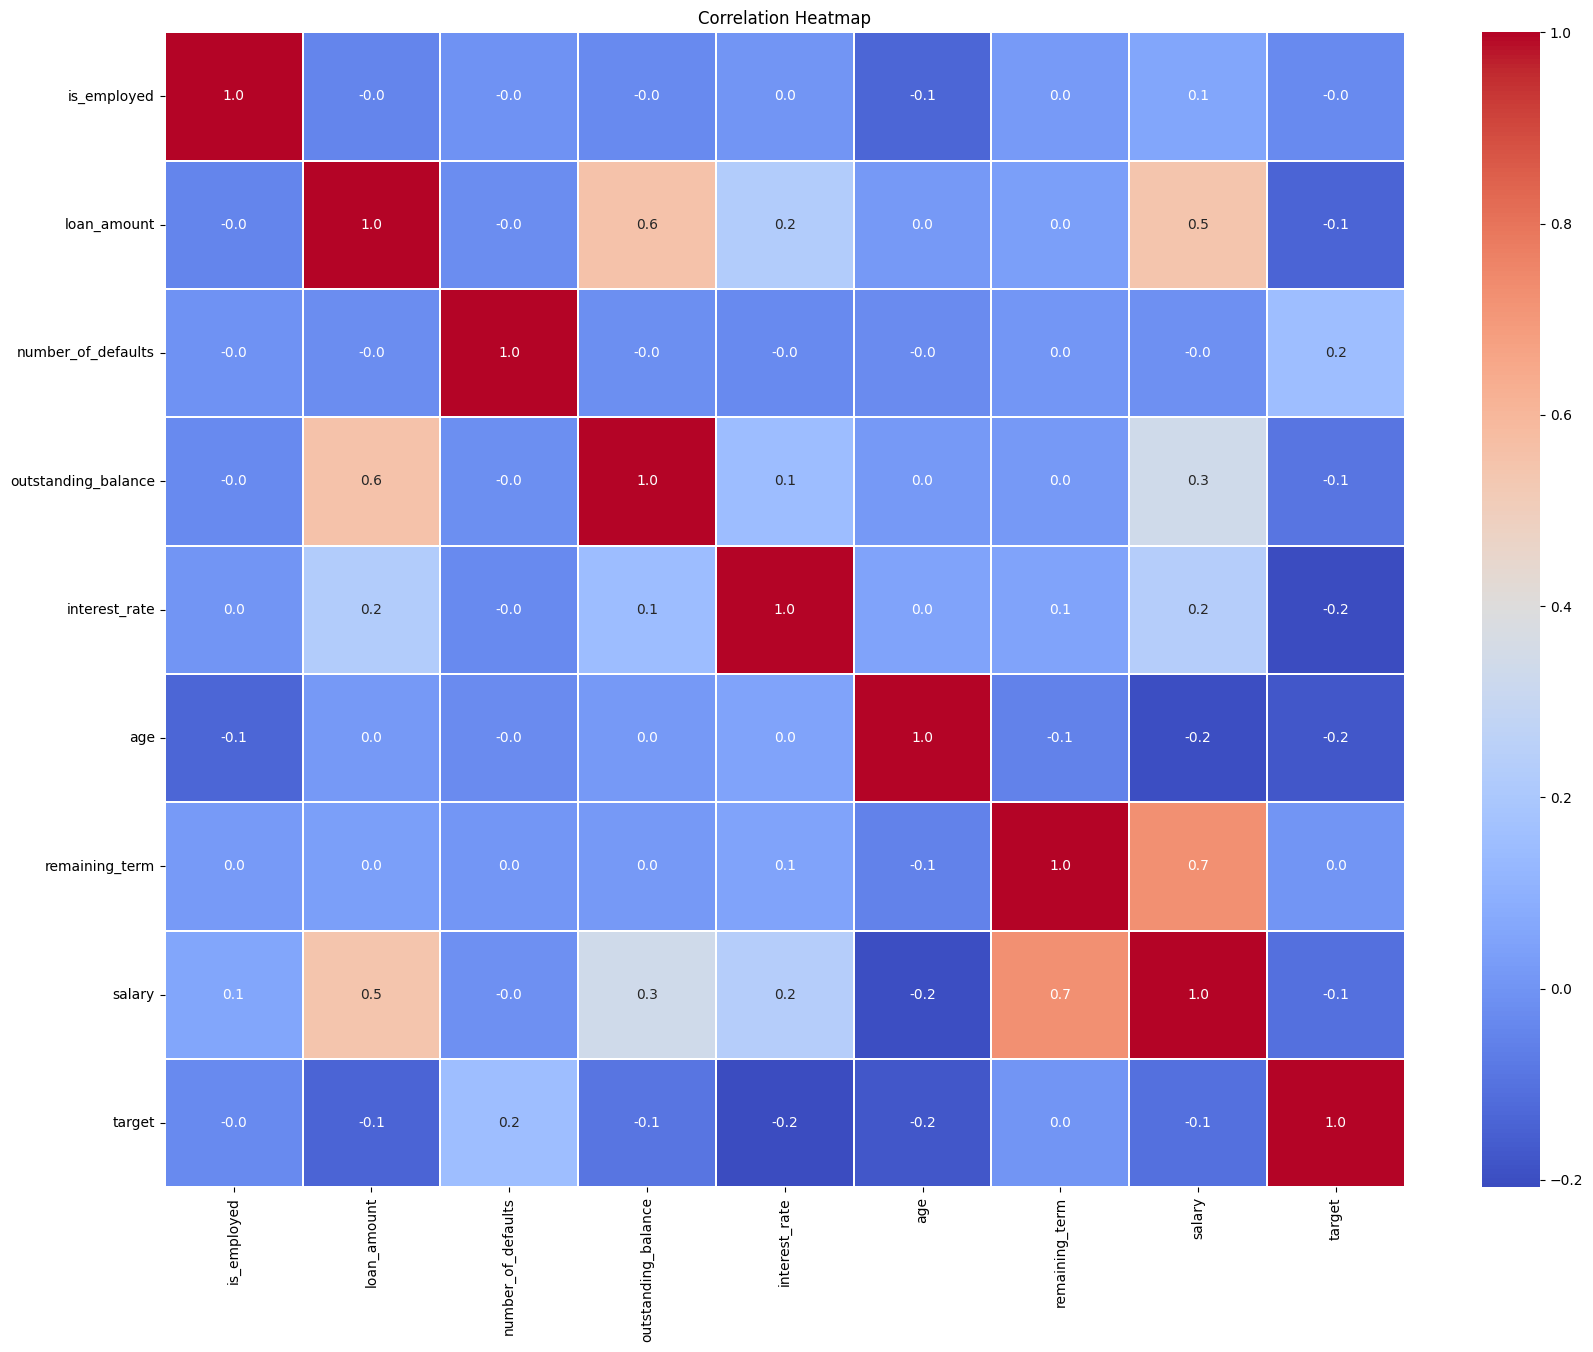

In [43]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool']).copy()
numeric_df['target'] = df['target']
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Binning functions
def bin_age(age):
    bins = [0, 18, 30, 40, 50, float('inf')]
    labels = ['0-18', '19-30', '31-40', '41-50', '51+']
    return pd.cut(age, bins=bins, labels=labels, right=False)

In [45]:
def bin_salary(salary):
    salary_bins = [0, 2273.93, 2665.44, 3146.58, 10000]
    salary_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
    return pd.cut(salary, bins=salary_bins, labels=salary_labels, right=False)

In [46]:
# Custom transformer for age binning
def age_bin_transformer(X):
    return pd.DataFrame(X).apply(lambda col: bin_age(col)).values


In [47]:
# Custom transformer for salary binning
def salary_bin_transformer(X):
    return pd.DataFrame(X).apply(lambda col: bin_salary(col)).values

In [48]:
# Define the preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [49]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [50]:
# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('age_bin', FunctionTransformer(age_bin_transformer), ['age']),
        ('salary_bin', FunctionTransformer(salary_bin_transformer), ['salary'])
    ]
)

In [51]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('age_bin', FunctionTransformer(age_bin_transformer), ['age']),
        ('salary_bin', FunctionTransformer(salary_bin_transformer), ['salary'])
    ],
    remainder='passthrough'
)

In [53]:
# Define the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [54]:
X = df.drop(columns=['target'])
y = df['target']

In [55]:
X.columns

Index(['gender', 'disbursement_date', 'currency', 'country', 'is_employed',
       'job', 'location', 'loan_amount', 'number_of_defaults',
       'outstanding_balance', 'interest_rate', 'age', 'remaining_term',
       'salary', 'marital_status', 'loan_status'],
      dtype='object')

In [56]:
# Fit the pipeline (if needed) and save it
pipeline.fit(X)  # Exclude the target column if it's included in the DataFrame


c:\projects\python\Predicting-Probability-of-Default\claxon-env\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amount',
                                                   'number_of_defaults',
                                                   'outstanding_balance',
                                                   'interest_rate', 'age',
                                                   'remaining_term',
                                                   'salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy...frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'currency',
                                                   'country', 'job', 'location',
                                                   'marital_status',
                                                   'loan_status']),
                                                 ('age_bin',
                                                  FunctionTransformer(func=<function age_bin_transformer at 0x000001AE9849C860>),
                                                  ['age']),
                                                 ('salary_bin',
                                                  FunctionTransformer(func=<function salary_bin_transformer at 0x000001AE8AF44040>),
                                                  ['salary'])]))])

In [57]:
# Save the pipeline
joblib.dump(pipeline, '../pipelines/data_processing_pipeline.pkl')

['../pipelines/data_processing_pipeline.pkl']

In [60]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
pd.DataFrame(X_train).to_csv('../data/train/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('../data/test/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('../data/train/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('../data/test/y_test.csv', index=False)